## 4 nodes

In [1]:
%run ../imports.py

In [2]:
G = nx.DiGraph()

In [3]:
G.add_nodes_from([0,1,2,3,4,5,6])
G.add_edges_from([
    (0,1),
    (0,2),
    (3,2),
    (2,4),
    (5,3),
    (6,5)
])

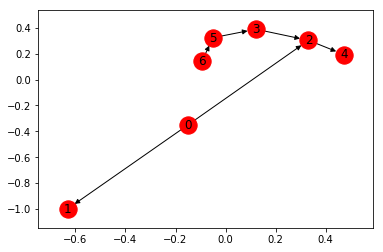

In [4]:
nx.draw_networkx(G)

In [5]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

5

In [6]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [7]:
Q

matrix([[ 0.7204, -0.3602, -0.5683,  0.1306,  0.1019, -0.0297,  0.0053],
        [ 0.2506, -0.1253,  0.2035, -0.6174, -0.0856,  0.6462, -0.272 ],
        [-0.3887,  0.1943, -0.5232,  0.2095,  0.4001,  0.4587, -0.3507],
        [ 0.1116, -0.0558,  0.2027,  0.6044, -0.5524,  0.18  , -0.4905],
        [-0.1549,  0.0774, -0.3584,  0.0148, -0.5699,  0.3826,  0.6084]])

In [8]:
sigma

array([[ 0.2406,  0.0088, -0.0036,  0.0282,  0.152 ],
       [ 0.0088,  0.2916,  0.0106,  0.0064,  0.0576],
       [-0.0036,  0.0106,  0.4114, -0.0084, -0.0915],
       [ 0.0282,  0.0064, -0.0084,  0.7382,  0.0204],
       [ 0.152 ,  0.0576, -0.0915,  0.0204,  2.6251]])

In [9]:
eqL

matrix([[ 1.4544e+00, -7.2718e-01, -4.8479e-01, -1.6160e-01,  1.4411e-16,
         -5.3865e-02, -2.6933e-02],
        [-7.2718e-01,  3.6359e-01,  2.4239e-01,  8.0798e-02, -1.8347e-16,
          2.6933e-02,  1.3466e-02],
        [-4.8479e-01,  2.4239e-01,  1.1616e+00, -4.4613e-01, -5.0000e-01,
          1.7955e-02,  8.9776e-03],
        [-1.6160e-01,  8.0798e-02, -4.4613e-01,  1.0180e+00,  7.3649e-16,
         -4.9401e-01,  2.9925e-03],
        [ 7.2188e-16, -1.3776e-16, -5.0000e-01,  6.4672e-16,  5.0000e-01,
         -6.2993e-17,  4.6533e-17],
        [-5.3865e-02,  2.6933e-02,  1.7955e-02, -4.9401e-01, -3.5916e-17,
          1.0020e+00, -4.9900e-01],
        [-2.6933e-02,  1.3466e-02,  8.9776e-03,  2.9925e-03,  8.8896e-17,
         -4.9900e-01,  5.0050e-01]])

In [10]:
posG, negG = separate_graphs(eqL)

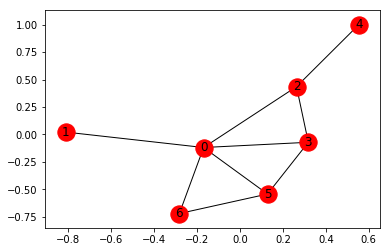

In [12]:
nx.draw_networkx(posG)

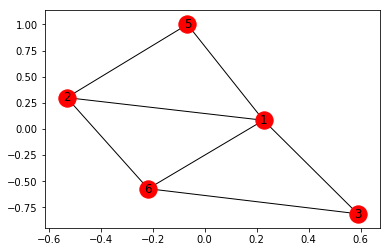

In [13]:
nx.draw_networkx(negG)